In [16]:
# Import Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [17]:
train_data=pd.read_excel(r'C:/Flightprediction/Data_Train.xlsx')

In [18]:
train_data.shape # total 10683 rows and 11 columns

(10683, 11)

In [19]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [20]:
train_data.info()# object data and int data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [21]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [22]:
 #train_data.isnull().sum() [having only one missing values lets drop it]
train_data.dropna(inplace=True)

In [23]:
train_data.shape

(10682, 11)

# EDA

In [24]:
train_data["Journey_DAY"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [25]:
train_data["Journey_MONTH"]=pd.to_datetime(train_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [26]:
# drop Date_of_journy apna matlab niakl liya
train_data.drop("Date_of_Journey",axis=1,inplace=True)

In [27]:
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour

In [28]:
train_data["Dep_minutes"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [29]:
 #lets drop DEp_Time
train_data.drop("Dep_Time",axis=1,inplace=True)

In [30]:
train_data["Arrival_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour

In [31]:
train_data["Arrival_minutes"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute

In [32]:
#droping Arrival time
train_data.drop("Arrival_Time",axis=1,inplace=True)

In [33]:
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [34]:
# Duration time is the time for travel
# so its  a difference between departure time and arrival time
train_data["Duration"].reset_index()

,index,Duration
0,0,2h 50m
1,1,7h 25m
2,2,19h
3,3,5h 25m
4,4,4h 45m
...,...,...
10677,10678,2h 30m
10678,10679,2h 35m
10679,10680,3h
10680,10681,2h 40m


In [35]:
duration=list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]=  "0h "  + duration[i]
            
duration_hours=[]
duration_minutes=[]

for  i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minutes.append(int(duration[i].split("m")[0].split()[-1]))
    

train_data["duration_hours"]=duration_hours
train_data["duration_minutes"]=duration_minutes

In [36]:
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [37]:
# lets drop the Duration column
train_data.drop("Duration",axis=1,inplace=True)

In [38]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


# handle categorical featurees

In [39]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:ylabel='Airline'>

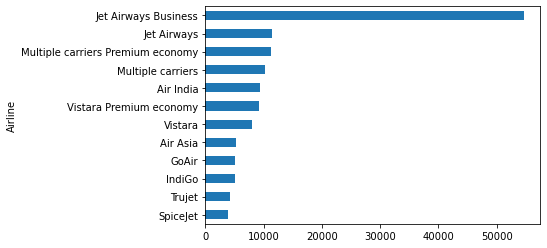

In [40]:
train_data.groupby('Airline')['Price'].median().sort_values().plot.barh()

<AxesSubplot:ylabel='Source'>

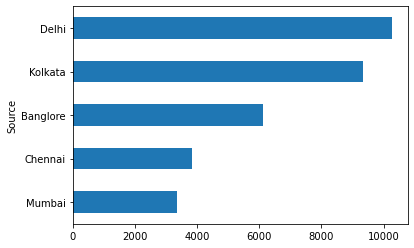

In [41]:
train_data.groupby('Source')['Price'].median().sort_values(ascending=True).plot.barh()


In [42]:
train_data.groupby('Destination')['Price'].median().sort_values(ascending=True).index

Index(['Hyderabad', 'Kolkata', 'Delhi', 'Banglore', 'Cochin', 'New Delhi'], dtype='object', name='Destination')

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

<AxesSubplot:ylabel='Destination'>

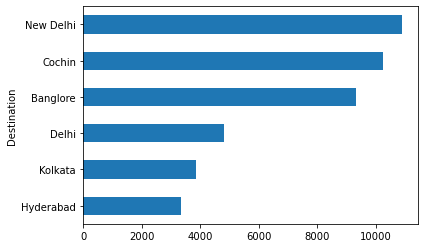

In [44]:
train_data.groupby('Destination')['Price'].median().sort_values().plot.barh()

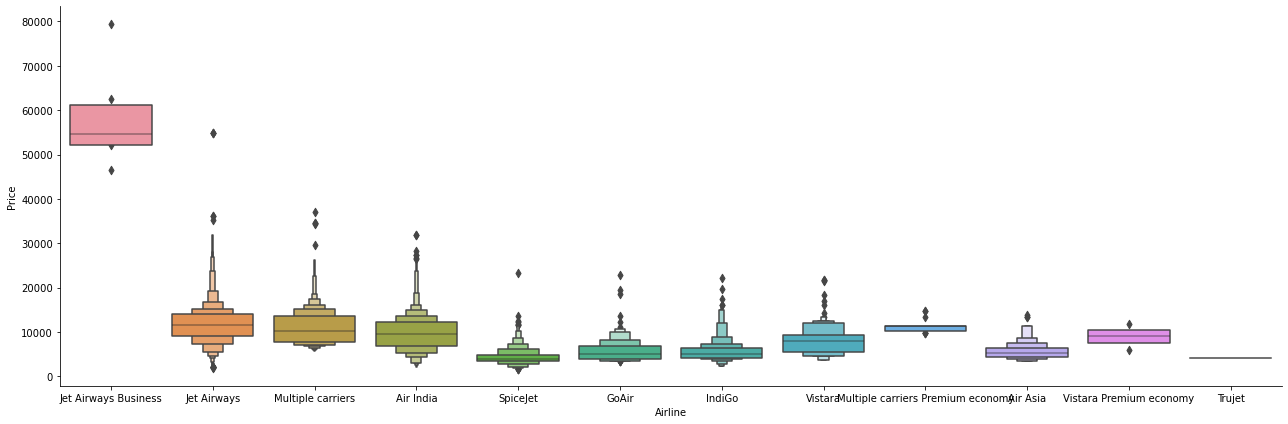

In [45]:
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [46]:
# lets apply onehot encoding upon Airline column
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [47]:
# lets do the same thing for source
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

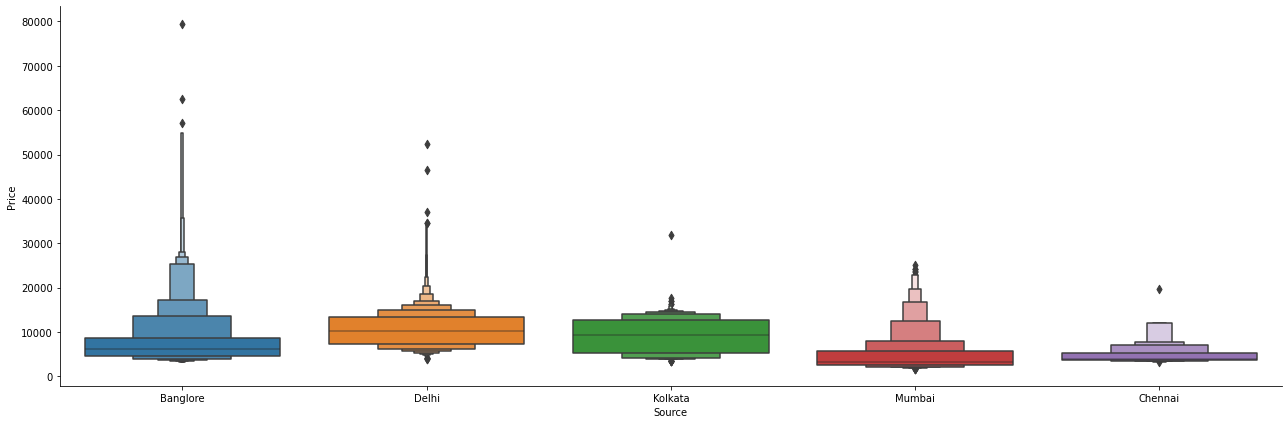

In [48]:
sns.catplot(y="Price",x="Source",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [49]:
# lets apply onehot encoding upon Sorce column
sorce=train_data[["Source"]]
sorce=pd.get_dummies(sorce,drop_first=True)
sorce.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


# you can improve your data by removing outliers

In [51]:
# do same for destination
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

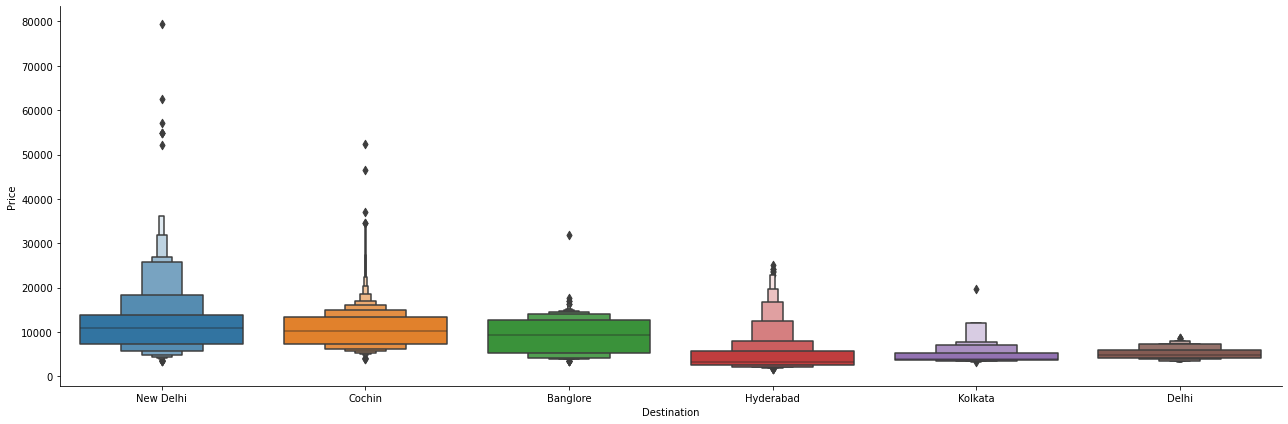

In [52]:
sns.catplot(y="Price",x="Destination",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)


In [53]:
# lets apply onehot encoding upon Destination column
destination=train_data[["Source"]]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [54]:
train_data["Total_Stops"].value_counts().index

Index(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], dtype='object')

In [55]:
train_data["Additional_Info"].value_counts()


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [56]:
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)# droping 

# Lets handle total _stops

<AxesSubplot:ylabel='Total_Stops'>

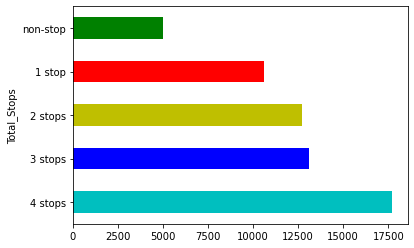

In [57]:

train_data.groupby("Total_Stops")["Price"].mean().sort_values(ascending=False).plot.barh(color=["c","b","y","r","g"])

In [58]:
# so we will do ordinal encoding for this column
train_data["Total_Stops"].replace({'1 stop':1, 'non-stop':0, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)


In [59]:
train_data['Total_Stops'].value_counts()


1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [60]:
# now concat all the datasets Airline+Soure+Destinartion
data_train=pd.concat([train_data,Airline,sorce,destination],axis=1)

In [61]:
data_train.drop(['Airline', 'Source', 'Destination'],axis=1,inplace=True)

In [62]:
data_train.shape

(10682, 29)

In [64]:
test_data=pd.read_excel('C:/Flightprediction/Test_set.xlsx')

In [65]:
test_data.shape

(2671, 10)

In [66]:
test_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info


# Lets do all the steps for test data


In [67]:
test_data["Journey_DAY"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day

test_data["Journey_MONTH"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [68]:
test_data.drop("Date_of_Journey",axis=1,inplace=True)

In [69]:
test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour

In [70]:
test_data["Dep_minutes"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute


In [71]:
test_data.drop("Dep_Time",axis=1,inplace=True)

In [72]:
test_data["Arrival_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour

In [73]:
test_data["Arrival_minutes"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute

In [74]:
test_data.drop("Arrival_Time",axis=1,inplace=True)

In [75]:
duration1=list(test_data["Duration"])

In [76]:
len(duration1)

2671

In [77]:
for i in range(len(duration1)):
    if len(duration1[i].split())!=2:
        if "h" in duration1[i]:
            duration1[i]=duration1[i].strip() + " 0m"
        else:
            duration1[i]=  "0h "  + duration1[i]
            
duration_hours=[]
duration_minutes=[]

for  i in range(len(duration1)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minutes.append(int(duration[i].split("m")[0].split()[-1]))
    

test_data["duration_hours"]=duration_hours
test_data["duration_minutes"]=duration_minutes

In [78]:
test_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,2,50


In [79]:
# lets apply onehot encoding upon Airline column
Airline=test_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [80]:
# lets apply onehot encoding upon Sorce column
sorce=test_data[["Source"]]
sorce=pd.get_dummies(sorce,drop_first=True)
sorce.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [81]:
# lets apply onehot encoding upon Destination column
destination=test_data[["Source"]]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [82]:
test_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Journey_DAY', 'Journey_MONTH', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'duration_hours',
       'duration_minutes'],
      dtype='object')

In [83]:
# so we will do ordinal encoding for this column
test_data["Total_Stops"].replace({'1 stop':1, 'non-stop':0, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)


In [84]:
# now concat all the datasets Airline+Soure+Destinartion
data_test=pd.concat([test_data,Airline,sorce,destination],axis=1)

In [85]:
data_test.shape,data_train.shape

((2671, 33), (10682, 29))

In [86]:
data_train.total_travel_time.head(2)

AttributeError: 'DataFrame' object has no attribute 'total_travel_time'

In [87]:
data_train.head(1)

,Total_Stops,Price,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,0


In [88]:
data_test.drop(['Airline', 'Source', 'Destination','Route','Additional_Info','Duration'],axis=1,inplace=True)

In [89]:
data_test.shape

(2671, 27)

In [90]:
data_train.shape ,data_test.shape

((10682, 29), (2671, 27))

In [91]:
x=data_train.drop(["Airline_Trujet","Price"],axis=1)

In [92]:
x.head(1)

,Total_Stops,Journey_DAY,Journey_MONTH,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
y=data_train["Price"]

In [94]:
y=np.array(y)

<AxesSubplot:>

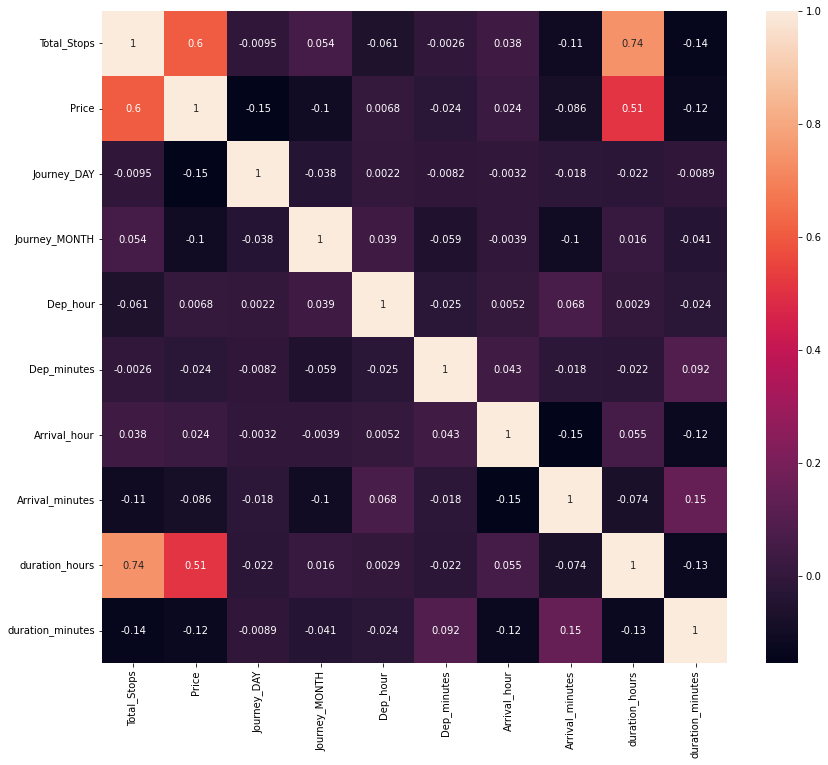

In [95]:
# find the correlation between dependent and independent feature
plt.figure(figsize=(14,12))
sns.heatmap(train_data.corr(),annot=True)

In [96]:
# important feature using extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

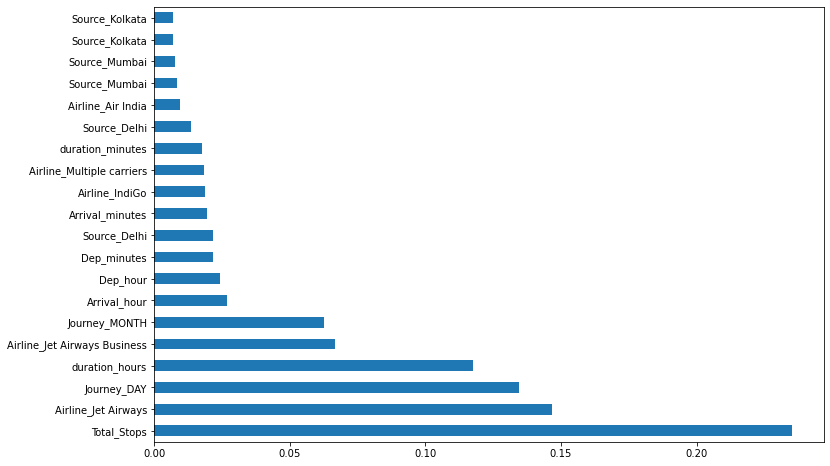

In [101]:
plt.figure(figsize=(12,8))
feature_imp=pd.Series(selection.feature_importances_,index=x.columns)
feature_imp.nlargest(20).plot.barh()
plt.show()

In [98]:
# fit the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.ensemble import RandomForestRegressor
rgf_rf=RandomForestRegressor()
rgf_rf.fit(X_train,y_train)

RandomForestRegressor()

In [100]:
y_pred=rgf_rf.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

<AxesSubplot:ylabel='Density'>

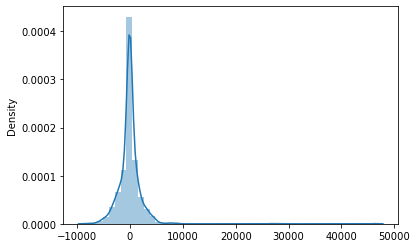

In [106]:
sns.distplot(y_test-y_pred)

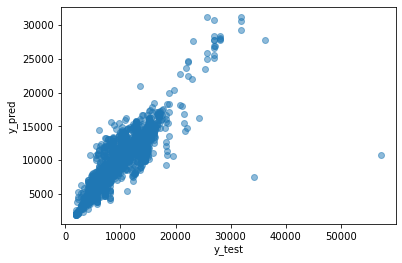

In [107]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [108]:
mean_absolute_error(y_test,y_pred)

1188.2285996261835

In [109]:
np.sqrt(mean_squared_error(y_test,y_pred))

2122.623229031895

In [110]:
r2_score(y_test,y_pred)

0.7910436136196792

# hyperparametertuning most important

In [111]:
RandomForestRegressor()

RandomForestRegressor()

In [112]:
# Randomised search cv
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [114]:
# create the random grid
random_grid={
    "n_estimators":n_estimators,
     "max_features":max_features,
     "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf}

In [115]:
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split

In [116]:
rf_random=RandomizedSearchCV(estimator=rgf_rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)


In [117]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [120]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [123]:
prediction=rf_random.predict(X_test)

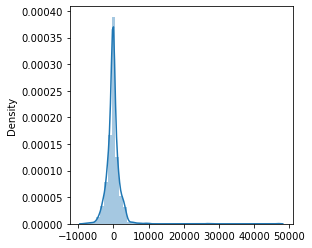

In [124]:
plt.figure(figsize=(4,4))
sns.distplot(y_test-prediction)
plt.show()

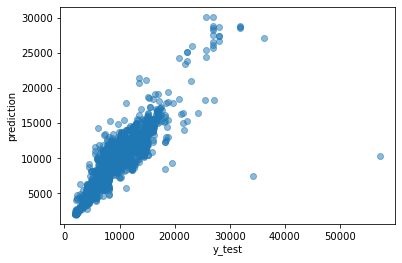

In [125]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

# save the model to reuse the program

In [126]:
import pickle
file=open('Flight_rf.pkl','wb')
pickle.dump(rf_random,file)

In [127]:
#model=open("Flight_rf.pkl",'rb')
forest=pickle.load(model)

NameError: name 'model' is not defined